# CSE252C: Homework 1
## Computing Resources
Please read the README file of this repository for the instructions
## Instructions
1. Attempt all questions.
2. Please comment all your code adequately.
3. Include all relevant information such as text answers, output images in notebook.
4. **Academic integrity:** The homework must be completed individually.

5. **Submission instructions:**  
 (a) Submit the notebook and its PDF version on Gradescope.  
 (b) Rename your submission files as Lastname_Firstname.ipynb and Lastname_Firstname.pdf.  
 (c) Correctly select pages for each answer on Gradescope to allow proper grading.

6. **Due date:** Assignments are due Mon, May 4, by 4pm PST.

## Question 1: Warm Up

We will first try SFM using the original implementation from $\mathtt{libviso2}$. We will test on a dataset containing 300 images from one sequence of the KITTI dataset with ground-truth camera poses and camera calibration information. 

Run the SFM algorithm using the following script. You are required to report two error metrics. The error metric for rotation is defined as the mean of Frobenius norm of the difference between the ground-truth rotation matrix and predicted rotation matrix. The error metric for translation is defined as mean of the L2 distance. Both errors will be printed on the screen as you run the code.  **(5 points)**

In [8]:
import os
import sys
# change your base path
os.chdir('./pyviso/') # './'
print(os.getcwd())

/datasets/home/home-02/70/670/y2di/cse252c_hw1/pyviso


FileNotFoundError: [Errno 2] No such file or directory: './pyviso/'

In [2]:
import os
import numpy as np
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
import viso2
import matplotlib.pyplot as plt
from skimage.io import imread
import time

def errorMetric(RPred, RGt, TPred, TGt):
    diffRot = (RPred - RGt)
    diffTrans = (TPred - TGt)
    errorRot = np.sqrt(np.sum(np.multiply(diffRot.reshape(-1), diffRot.reshape(-1))))
    errorTrans = np.sqrt(np.sum(np.multiply(diffTrans.reshape(-1), diffTrans.reshape(-1))))

    return errorRot, errorTrans

if_vis = True # set to True to do the visualization per frame; the images will be saved at '.vis/'. Turn off if you just want the camera poses and errors
if_on_screen = False # if True the visualization per frame is going to be displayed realtime on screen; if False there will be no display, but in both options the images will be saved

# parameter settings (for an example, please download
# dataset_path = '../dataset'
dataset_path = '/datasets/cse152-252-sp20-public/dataset_SfM' # On the ``ieng6.ucsd.edu`` server
img_dir      = os.path.join(dataset_path, 'sequences/00/image_0')
gt_dir       = os.path.join(dataset_path, 'poses/00.txt')
calibFile    = os.path.join(dataset_path, 'sequences/00/calib.txt')
border       = 50;
gap          = 15;

# Load the camera calibration information
with open(calibFile) as fid:
    calibLines = fid.readlines()
    calibLines = [calibLine.strip() for calibLine in calibLines]

calibInfo = [float(calibStr) for calibStr in calibLines[0].split(' ')[1:]]
# param = {'f': calibInfo[0], 'cu': calibInfo[2], 'cv': calibInfo[6]}

# Load the ground-truth depth and rotation
with open(gt_dir) as fid:
    gtTr = [[float(TrStr) for TrStr in line.strip().split(' ')] for line in fid.readlines()]
gtTr = np.asarray(gtTr).reshape(-1, 3, 4)

# param['height'] = 1.6
# param['pitch']  = -0.08
# param['match'] = {'pre_step_size': 64}
first_frame  = 0
last_frame   = 300
epi = 1e-8

# init visual odometry
params = viso2.Mono_parameters()
params.calib.f = calibInfo[0]
params.calib.cu = calibInfo[2]
params.calib.cv = calibInfo[6]
params.height = 1.6
params.pitch = -0.08


first_frame  = 0
last_frame   = 300

# init transformation matrix array
Tr_total = []
Tr_total_np = []
Tr_total.append(viso2.Matrix_eye(4))
Tr_total_np.append(np.eye(4))

# init viso module
visoMono = viso2.VisualOdometryMono(params)

if if_vis:
    save_path = 'vis'
    os.makedirs(save_path, exist_ok=True)

    # create figure
    fig = plt.figure(figsize=(10, 15))
    ax1 = plt.subplot(211)
    ax1.axis('off')
    ax2 = plt.subplot(212)
    ax2.set_xticks(np.arange(-100, 100, step=10))
    ax2.set_yticks(np.arange(-500, 500, step=10))
    ax2.axis('equal')
    ax2.grid()
    if if_on_screen:
        plt.ion()
    else:
        plt.ioff()

Mean Error Rotation: 6947558.55240
Mean Error Translation: 9718750861.05217
== [Result] Frame: 0, Matches 0, Inliers: 0.00
Saved at vis/frame000.jpg


<Figure size 432x288 with 0 Axes>

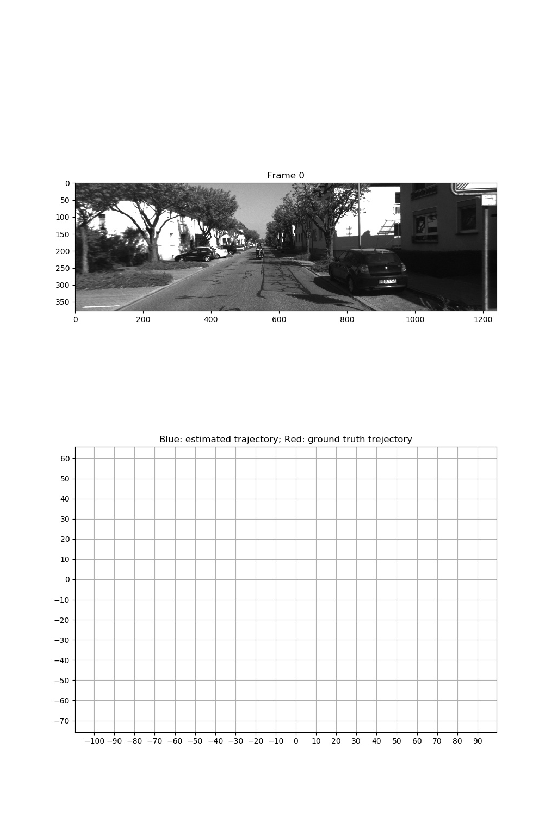

[[ 1.     -0.0027 -0.0031 -0.0032]
 [ 0.0027  1.     -0.0026  0.0011]
 [ 0.0031  0.0026  1.      0.4828]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.07468
Mean Error Translation: 97.56708
== [Result] Frame: 1, Matches 320, Inliers: 86.87
Saved at vis/frame001.jpg
[[ 1.     -0.0022 -0.0078 -0.0051]
 [ 0.0022  1.     -0.0041 -0.0018]
 [ 0.0078  0.0041  1.      0.9579]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.03918
Mean Error Translation: 48.97651
== [Result] Frame: 2, Matches 325, Inliers: 81.23
Saved at vis/frame002.jpg
[[ 0.9999 -0.0057 -0.014   0.0024]
 [ 0.0056  1.     -0.0053 -0.0075]
 [ 0.014   0.0052  0.9999  1.4471]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.02883
Mean Error Translation: 32.77574
== [Result] Frame: 3, Matches 329, Inliers: 82.67
Saved at vis/frame003.jpg
[[ 0.9998 -0.0058 -0.0197 -0.0071]
 [ 0.0057  1.     -0.006  -0.0118]
 [ 0.0197  0.0059  0.9998  1.9428]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0

Mean Error Rotation: 0.00538
Mean Error Translation: 3.52792
== [Result] Frame: 30, Matches 300, Inliers: 84.67
Saved at vis/frame030.jpg
[[ 0.998  -0.0017 -0.0633 -1.0514]
 [ 0.0013  1.     -0.0061 -0.2162]
 [ 0.0634  0.006   0.998  18.6366]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00526
Mean Error Translation: 3.42243
== [Result] Frame: 31, Matches 290, Inliers: 79.31
Saved at vis/frame031.jpg
[[ 0.9981 -0.0005 -0.0611 -1.1033]
 [-0.      1.     -0.009  -0.2258]
 [ 0.0612  0.009   0.9981 19.2957]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00519
Mean Error Translation: 3.32485
== [Result] Frame: 32, Matches 303, Inliers: 82.18
Saved at vis/frame032.jpg
[[ 0.9981 -0.0043 -0.0621 -1.1303]
 [ 0.0039  1.     -0.0077 -0.2411]
 [ 0.0621  0.0074  0.998  19.9495]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00513
Mean Error Translation: 3.23366
== [Result] Frame: 33, Matches 280, Inliers: 76.43
Saved at vis/frame033.jpg
[[ 0.9981 -0.0046 -0.0622

<Figure size 432x288 with 0 Axes>

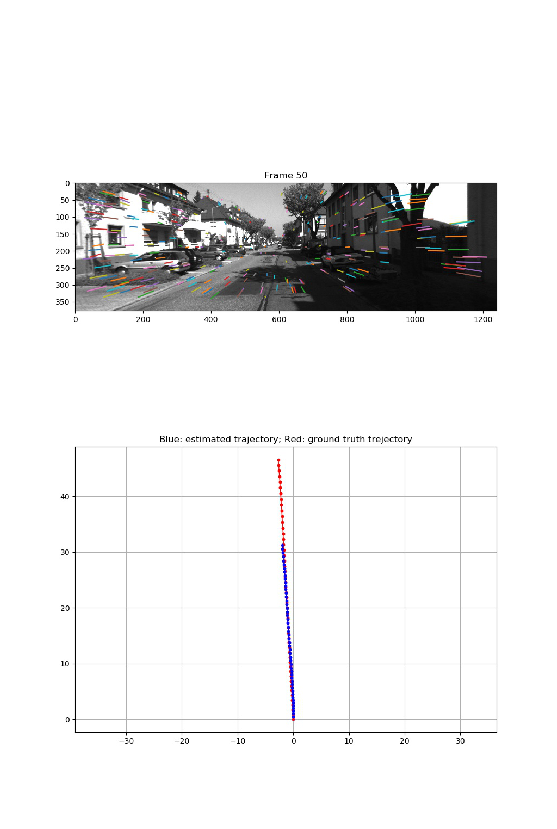

[[ 0.9967 -0.0098 -0.0811 -2.0378]
 [ 0.0099  1.      0.0011 -0.4046]
 [ 0.0811 -0.0019  0.9967 31.9888]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00392
Mean Error Translation: 2.21309
== [Result] Frame: 51, Matches 283, Inliers: 75.62
Saved at vis/frame051.jpg
[[ 0.9966 -0.0084 -0.082  -2.1024]
 [ 0.0081  1.     -0.0029 -0.4128]
 [ 0.082   0.0023  0.9966 32.7704]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00391
Mean Error Translation: 2.17449
== [Result] Frame: 52, Matches 300, Inliers: 80.33
Saved at vis/frame052.jpg
[[ 0.9965 -0.0091 -0.0829 -2.1695]
 [ 0.0085  0.9999 -0.0072 -0.4254]
 [ 0.083   0.0065  0.9965 33.5207]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00388
Mean Error Translation: 2.13777
== [Result] Frame: 53, Matches 307, Inliers: 79.48
Saved at vis/frame053.jpg
[[ 0.9964 -0.0095 -0.0846 -2.2358]
 [ 0.0088  0.9999 -0.0085 -0.4417]
 [ 0.0847  0.0077  0.9964 34.4381]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0

Mean Error Rotation: 0.00327
Mean Error Translation: 1.48544
== [Result] Frame: 80, Matches 315, Inliers: 86.03
Saved at vis/frame080.jpg
[[ 0.9922 -0.0092 -0.1246 -4.0301]
 [ 0.0075  0.9999 -0.0143 -0.7764]
 [ 0.1247  0.0133  0.9921 52.4438]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00325
Mean Error Translation: 1.46942
== [Result] Frame: 81, Matches 327, Inliers: 82.26
Saved at vis/frame081.jpg
[[ 0.9918 -0.0097 -0.1276 -4.077 ]
 [ 0.0083  0.9999 -0.011  -0.7906]
 [ 0.1277  0.0098  0.9918 52.9236]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00328
Mean Error Translation: 1.45391
== [Result] Frame: 82, Matches 320, Inliers: 84.37
Saved at vis/frame082.jpg
[[ 0.9916 -0.0102 -0.1287 -4.1429]
 [ 0.0092  0.9999 -0.0086 -0.8084]
 [ 0.1288  0.0074  0.9916 53.3925]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00328
Mean Error Translation: 1.43866
== [Result] Frame: 83, Matches 321, Inliers: 85.67
Saved at vis/frame083.jpg
[[ 0.9912 -0.0157 -0.1315

<Figure size 432x288 with 0 Axes>

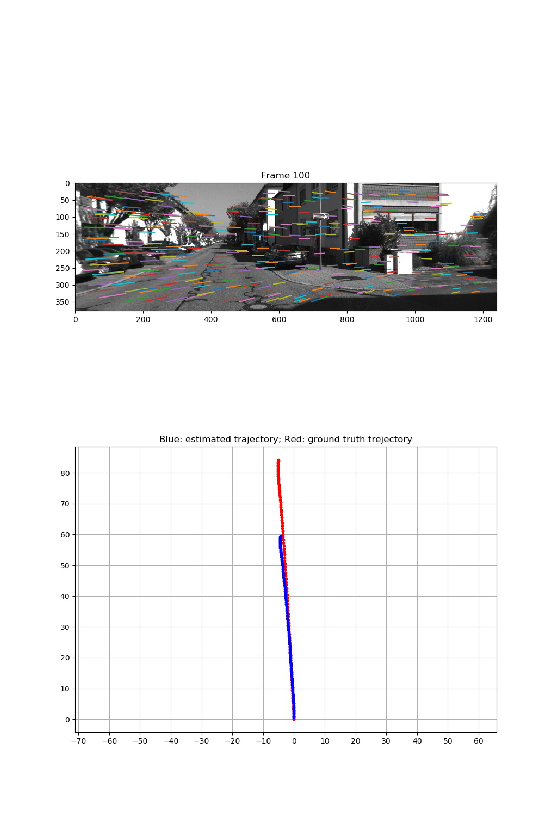

[[ 0.9851 -0.0388  0.1675 -4.2895]
 [ 0.0385  0.9992  0.0049 -0.9483]
 [-0.1676  0.0017  0.9859 59.8246]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00319
Mean Error Translation: 1.21033
== [Result] Frame: 101, Matches 330, Inliers: 83.64
Saved at vis/frame101.jpg
[[ 0.9759 -0.0385  0.2149 -4.183 ]
 [ 0.0383  0.9993  0.0048 -0.9526]
 [-0.2149  0.0035  0.9766 60.1273]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00319
Mean Error Translation: 1.19938
== [Result] Frame: 102, Matches 336, Inliers: 87.20
Saved at vis/frame102.jpg
[[ 0.9631 -0.0423  0.2659 -4.0492]
 [ 0.0427  0.9991  0.0045 -0.9628]
 [-0.2658  0.007   0.964  60.4066]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00322
Mean Error Translation: 1.18879
== [Result] Frame: 103, Matches 342, Inliers: 85.67
Saved at vis/frame103.jpg
[[ 0.9461 -0.0455  0.3206 -3.9106]
 [ 0.0461  0.9989  0.0057 -0.969 ]
 [-0.3205  0.0094  0.9472 60.6805]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation

Mean Error Rotation: 0.00324
Mean Error Translation: 0.98378
== [Result] Frame: 130, Matches 315, Inliers: 72.70
Saved at vis/frame130.jpg
[[ 0.1538 -0.0546  0.9866  8.5394]
 [ 0.0793  0.9959  0.0427 -0.4923]
 [-0.9849  0.0717  0.1576 65.1382]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00322
Mean Error Translation: 0.97742
== [Result] Frame: 131, Matches 320, Inliers: 77.19
Saved at vis/frame131.jpg
[[ 0.1438 -0.0538  0.9881  8.9158]
 [ 0.0819  0.9957  0.0422 -0.4747]
 [-0.9862  0.0749  0.1476 65.1855]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00320
Mean Error Translation: 0.97112
== [Result] Frame: 132, Matches 327, Inliers: 81.65
Saved at vis/frame132.jpg
[[ 0.1359 -0.0532  0.9893  9.3034]
 [ 0.0829  0.9957  0.0422 -0.4597]
 [-0.9872  0.0763  0.1398 65.2358]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00319
Mean Error Translation: 0.96494
== [Result] Frame: 133, Matches 321, Inliers: 83.49
Saved at vis/frame133.jpg
[[ 0.13   -0.0526  0.

<Figure size 432x288 with 0 Axes>

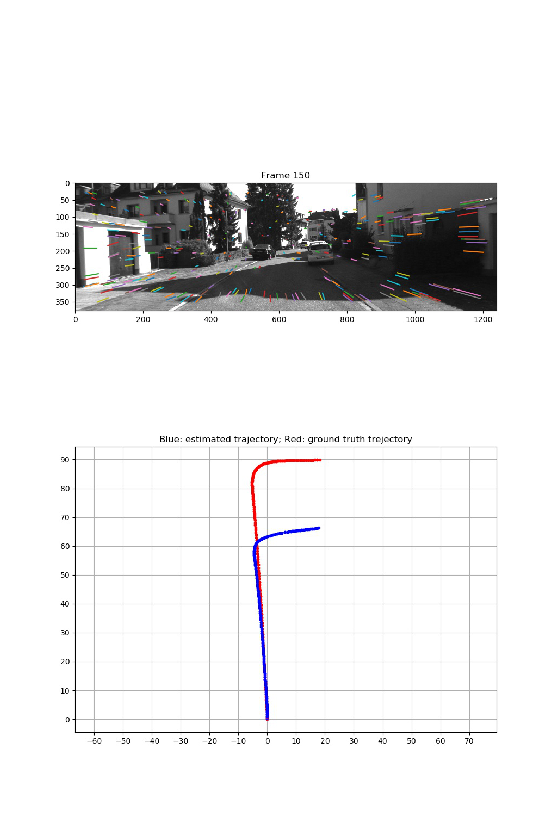

[[ 0.1394 -0.0555  0.9887 18.4878]
 [ 0.096   0.9945  0.0422 -0.1231]
 [-0.9856  0.0891  0.1439 66.3944]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00301
Mean Error Translation: 0.87276
== [Result] Frame: 151, Matches 264, Inliers: 77.65
Saved at vis/frame151.jpg
[[ 0.1417 -0.0498  0.9887 19.0716]
 [ 0.0906  0.9952  0.0371 -0.1028]
 [-0.9858  0.0843  0.1455 66.485 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00300
Mean Error Translation: 0.86855
== [Result] Frame: 152, Matches 271, Inliers: 77.86
Saved at vis/frame152.jpg
[[ 0.1431 -0.0473  0.9886 19.6474]
 [ 0.09    0.9953  0.0346 -0.09  ]
 [-0.9856  0.084   0.1467 66.5619]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00301
Mean Error Translation: 0.86446
== [Result] Frame: 153, Matches 280, Inliers: 81.07
Saved at vis/frame153.jpg
[[ 0.1432 -0.0469  0.9886 20.2879]
 [ 0.0869  0.9956  0.0346 -0.0687]
 [-0.9859  0.081   0.1467 66.6656]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation

Mean Error Rotation: 0.00293
Mean Error Translation: 0.77918
== [Result] Frame: 180, Matches 318, Inliers: 81.76
Saved at vis/frame180.jpg
[[-0.0258 -0.0531  0.9983 43.2157]
 [ 0.0665  0.9963  0.0547  0.6461]
 [-0.9975  0.0678 -0.0222 68.3942]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00292
Mean Error Translation: 0.77594
== [Result] Frame: 181, Matches 325, Inliers: 85.85
Saved at vis/frame181.jpg
[[-0.0274 -0.0543  0.9981 43.752 ]
 [ 0.0707  0.9959  0.0562  0.6665]
 [-0.9971  0.0721 -0.0235 68.3673]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00293
Mean Error Translation: 0.77268
== [Result] Frame: 182, Matches 332, Inliers: 84.94
Saved at vis/frame182.jpg
[[-0.0289 -0.0553  0.9981 44.2706]
 [ 0.072   0.9958  0.0572  0.6863]
 [-0.997   0.0735 -0.0248 68.3514]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00292
Mean Error Translation: 0.76947
== [Result] Frame: 183, Matches 324, Inliers: 86.42
Saved at vis/frame183.jpg
[[-0.0299 -0.0545  0.

<Figure size 432x288 with 0 Axes>

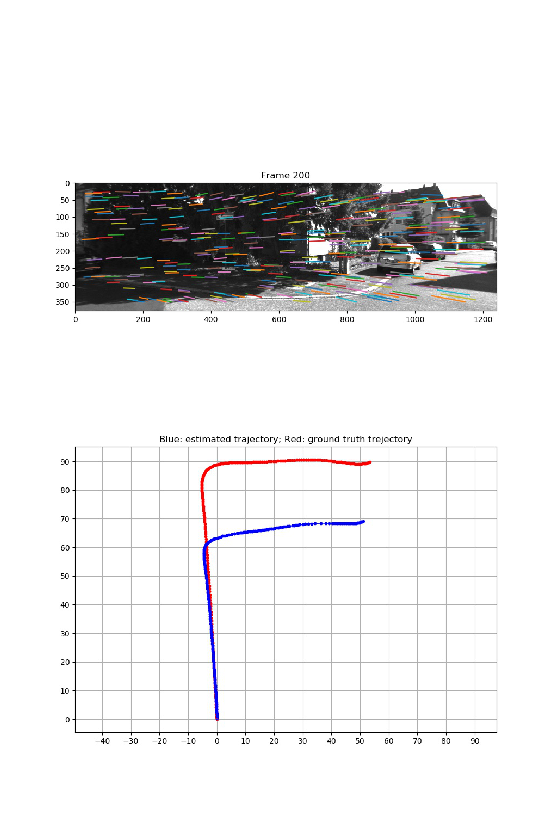

[[ 0.4065 -0.0498  0.9123 51.4056]
 [ 0.0638  0.9976  0.026   0.874 ]
 [-0.9114  0.0476  0.4087 69.3567]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00287
Mean Error Translation: 0.71542
== [Result] Frame: 201, Matches 352, Inliers: 83.52
Saved at vis/frame201.jpg
[[ 0.4606 -0.0481  0.8863 51.7181]
 [ 0.066   0.9976  0.0198  0.8761]
 [-0.8852  0.0494  0.4627 69.5668]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00288
Mean Error Translation: 0.71254
== [Result] Frame: 202, Matches 343, Inliers: 83.38
Saved at vis/frame202.jpg
[[ 0.5155 -0.0431  0.8558 52.0087]
 [ 0.0661  0.9978  0.0105  0.8748]
 [-0.8544  0.0512  0.5172 69.8034]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00288
Mean Error Translation: 0.70962
== [Result] Frame: 203, Matches 332, Inliers: 83.43
Saved at vis/frame203.jpg
[[ 0.5693 -0.0391  0.8212 52.2627]
 [ 0.0676  0.9977  0.0006  0.8671]
 [-0.8193  0.0551  0.5707 70.048 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation

Mean Error Rotation: 0.00286
Mean Error Translation: 0.64244
== [Result] Frame: 230, Matches 295, Inliers: 84.41
Saved at vis/frame230.jpg
[[ 0.9828  0.0008  0.1846 54.9838]
 [ 0.0053  0.9995 -0.0325  0.4772]
 [-0.1845  0.033   0.9823 80.7993]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00286
Mean Error Translation: 0.64031
== [Result] Frame: 231, Matches 281, Inliers: 81.14
Saved at vis/frame231.jpg
[[ 0.982   0.      0.1887 55.0742]
 [ 0.0053  0.9996 -0.0277  0.4544]
 [-0.1886  0.0282  0.9816 81.2988]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00286
Mean Error Translation: 0.63818
== [Result] Frame: 232, Matches 308, Inliers: 82.79
Saved at vis/frame232.jpg
[[ 0.9812 -0.0027  0.1928 55.168 ]
 [ 0.0081  0.9996 -0.0273  0.4384]
 [-0.1927  0.0284  0.9808 81.8244]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00286
Mean Error Translation: 0.63600
== [Result] Frame: 233, Matches 313, Inliers: 80.83
Saved at vis/frame233.jpg
[[ 0.981  -0.0057  0.

<Figure size 432x288 with 0 Axes>

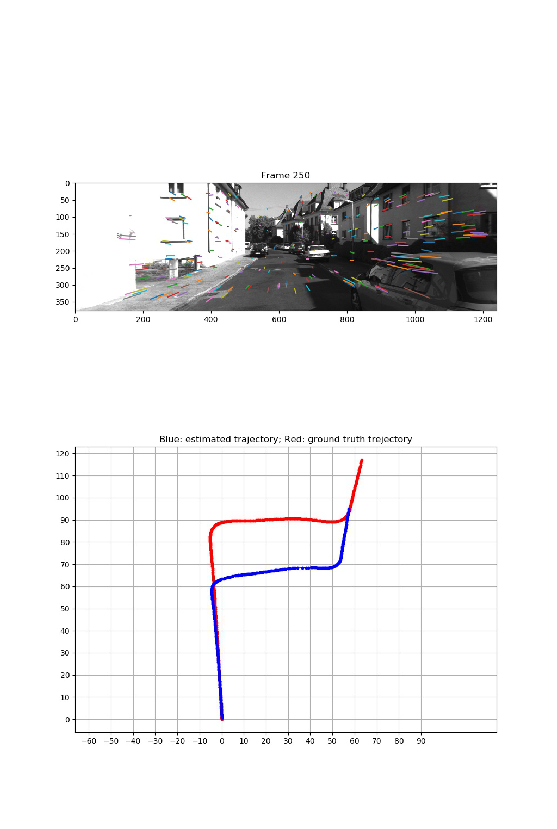

[[ 0.986   0.0012  0.1668 57.5067]
 [ 0.0052  0.9993 -0.0378 -0.1999]
 [-0.1667  0.0381  0.9853 95.6541]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00278
Mean Error Translation: 0.60310
== [Result] Frame: 251, Matches 255, Inliers: 72.16
Saved at vis/frame251.jpg
[[ 0.9856  0.0083  0.1689 57.5806]
 [-0.0013  0.9991 -0.0414 -0.2268]
 [-0.169   0.0406  0.9848 96.2237]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00278
Mean Error Translation: 0.60179
== [Result] Frame: 252, Matches 276, Inliers: 77.54
Saved at vis/frame252.jpg
[[ 0.9855  0.0156  0.1688 57.6784]
 [-0.0084  0.999  -0.0432 -0.2537]
 [-0.1693  0.0412  0.9847 96.8012]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00277
Mean Error Translation: 0.60046
== [Result] Frame: 253, Matches 274, Inliers: 78.83
Saved at vis/frame253.jpg
[[ 0.9853  0.0181  0.17   57.7884]
 [-0.0109  0.999  -0.043  -0.2819]
 [-0.1706  0.0405  0.9845 97.3917]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation

Mean Error Rotation: 0.00280
Mean Error Translation: 0.56055
== [Result] Frame: 279, Matches 275, Inliers: 69.82
Saved at vis/frame279.jpg
[[  0.9857   0.0312   0.1658  61.0374]
 [ -0.0244   0.9988  -0.0429  -1.3476]
 [ -0.1669   0.0383   0.9852 116.4405]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00279
Mean Error Translation: 0.55908
== [Result] Frame: 280, Matches 293, Inliers: 65.53
Saved at vis/frame280.jpg
[[  0.9858   0.0306   0.1654  61.1622]
 [ -0.0238   0.9988  -0.0433  -1.399 ]
 [ -0.1665   0.0387   0.9853 117.3131]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00279
Mean Error Translation: 0.55744
== [Result] Frame: 281, Matches 283, Inliers: 70.32
Saved at vis/frame281.jpg
[[  0.9862   0.0298   0.1627  61.3182]
 [ -0.0225   0.9987  -0.0467  -1.4533]
 [ -0.1639   0.0424   0.9856 118.2614]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00279
Mean Error Translation: 0.55603
== [Result] Frame: 282, Matches 290, Inliers: 68.28

<Figure size 432x288 with 0 Axes>

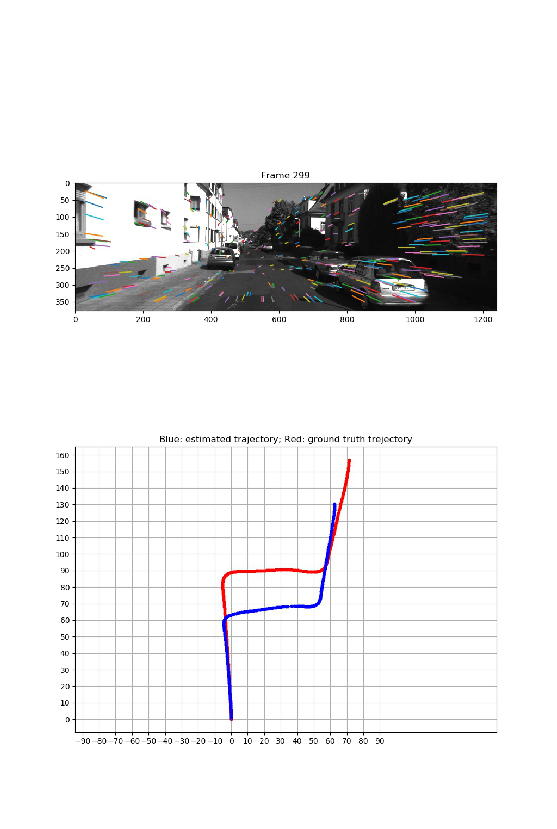

In [3]:
# for all frames do
if_replace = False
errorTransSum = 0
errorRotSum = 0
errorRot_list = []
errorTrans_list =[]

for frame in range(first_frame, last_frame):
    # 1-based index
    k = frame-first_frame+1

    # read current images
    I = imread(os.path.join(img_dir, '%06d.png'%frame))
    assert(len(I.shape) == 2) # should be grayscale

    # compute egomotion
    process_result = visoMono.process_frame(I, if_replace)
    Tr = visoMono.getMotion()
    matrixer = viso2.Matrix(Tr)
    Tr_np = np.zeros((4, 4))
    Tr.toNumpy(Tr_np) # so awkward...

    # accumulate egomotion, starting with second frame
    if k > 1:
        if process_result is False:
            if_replace = True
            Tr_total.append(Tr_total[-1])
            Tr_total_np.append(Tr_total_np[-1])
        else:
            if_replace = False
            Tr_total.append(Tr_total[-1] * viso2.Matrix_inv(Tr))
            Tr_total_np.append(Tr_total_np[-1] @ np.linalg.inv(Tr_np)) # should be the same
            print(Tr_total_np[-1])

    # output statistics
    num_matches = visoMono.getNumberOfMatches()
    num_inliers = visoMono.getNumberOfInliers()
    matches = visoMono.getMatches()
    matches_np = np.empty([4, matches.size()])

    for i,m in enumerate(matches):
        matches_np[:, i] = (m.u1p, m.v1p, m.u1c, m.v1c)

    if if_vis:
        # update image
        ax1.clear()
        ax1.imshow(I, cmap='gray', vmin=0, vmax=255)
        if num_matches != 0:
            for n in range(num_matches):
                ax1.plot([matches_np[0, n], matches_np[2, n]], [matches_np[1, n], matches_np[3, n]])
        ax1.set_title('Frame %d'%frame)

        # update trajectory
        if k > 1:
            ax2.plot([Tr_total_np[k-2][0, 3], Tr_total_np[k-1][0, 3]], \
                [Tr_total_np[k-2][2, 3], Tr_total_np[k-1][2, 3]], 'b.-', linewidth=1)
            ax2.plot([gtTr[k-2][0, 3], gtTr[k-1][0, 3]], \
                [gtTr[k-2][2, 3], gtTr[k-1][2, 3]], 'r.-', linewidth=1)
        ax2.set_title('Blue: estimated trajectory; Red: ground truth trejectory')

        plt.draw()

    # Compute rotation
    Rpred_p = Tr_total_np[k-2][0:3, 0:3]
    Rpred_c = Tr_total_np[k-1][0:3, 0:3]
    Rpred = Rpred_c.transpose() @ Rpred_p
    Rgt_p = np.squeeze(gtTr[k-2, 0:3, 0:3])
    Rgt_c = np.squeeze(gtTr[k-1, 0:3, 0:3])
    Rgt = Rgt_c.transpose() @ Rgt_p
    # Compute translation
    Tpred_p = Tr_total_np[k-2][0:3, 3:4]
    Tpred_c = Tr_total_np[k-1][0:3, 3:4]
    Tpred = Tpred_c - Tpred_p
    Tgt_p = gtTr[k-2, 0:3, 3:4]
    Tgt_c = gtTr[k-1, 0:3, 3:4]
    Tgt = Tgt_c - Tgt_p
    # Compute errors
    errorRot, errorTrans = errorMetric(Rpred, Rgt, Tpred, Tgt)
    errorRotSum = errorRotSum + errorRot
    errorTransSum = errorTransSum + errorTrans
    # errorRot_list.append(errorRot)
    # errorTrans_list.append(errorTrans)
    print('Mean Error Rotation: %.5f'%(errorRotSum / (k-1+epi)))
    print('Mean Error Translation: %.5f'%(errorTransSum / (k-1+epi)))



    print('== [Result] Frame: %d, Matches %d, Inliers: %.2f'%(frame, num_matches, 100*num_inliers/(num_matches+1e-8)))

    if if_vis:
        # input('Paused; Press Enter to continue') # Option 1: Manually pause and resume
        if if_on_screen:
            plt.pause(0.1) # Or Option 2: enable to this to auto pause for a while after daring to enable animation in case of a delay in drawing
        vis_path = os.path.join(save_path, 'frame%03d.jpg'%frame)
        fig.savefig(vis_path)
        print('Saved at %s'%vis_path)
        
        if frame % 50 == 0 or frame == last_frame-1:
            plt.figure(figsize=(10, 15))
            plt.imshow(plt.imread(vis_path))
            plt.axis('off')
            plt.show()


# input('Press Enter to exit')

1. Report the final rotation and translation error. **(2 points)**

The final errors are:
1. Rotation: 0.00277
2. Translation: 0.53721

Then answer the questions below

2. In $\mathtt{libviso2}$, the feature points are "bucketed" ($\mathtt{libviso2/src/matcher.cpp: Line 285 - 326}$), which means in a certain area of region, the number of detected keypoint pairs should be within certain bounds. Why?  **(3 points)**

It is due to the fact that nearby features in the original image should also be relatively close to each other in the other image. If the number of original features in a fixed bucket is within a bound, then bucket containing the corresponding features should also contain a bounded number of features.

3. We have run SFM on a single camera, which means the scale of translation is unknown. However, as you may have observed, the predicted trajectory is still somehow similar to the ground-truth trajectory. How does $\mathtt{libviso2}$ handle this ambiguity ($\mathtt{viso\_mono.cpp: Line 175}$)?  **(5 points)**

4. Briefly explain the RANSAC algorithm used in $\mathtt{libviso2}$ ($\mathtt{viso\_mono.cpp: Line 113 - 129}$).  **(5 points)**

It consists of the following steps:

For each iteration until a threshold
1. Draw 8 random feature points from the N points;
2. Estimate the fundamental matrix according to the 8 correspondance pairs;
3. Compute the number of inliers based on the fundamental matrix computed in step 2;
4. Update the number of inliers if there is an improvement.

## Question 2: Using SIFT [4] for SFM

In the second task, you are required to use keypoints and feature descriptors from SIFT for SFM. The SIFT implementation can be found in directory $\mathtt{SIFT}$. 

(A) Go to $\mathtt{SIFT}$ directory and run $\mathtt{runSIFT.py}$ (e.g. `python runSIFT.py --input /datasets/cse152-252-sp20-public/dataset_SfM/sequences/00/image_0/`). You will save the detected keypoints and feature descriptors under the directory $\mathtt{SIFT}$. For image $\mathtt{000abc.png}$, the pre-computed features and keypoints should be saved in a $\mathtt{.npy}$ file named as $\mathtt{000abc\_feature.npy}$. The variable should be a $130 \times N$ matrix with $\mathtt{single}$ precision, where $N$ is the number of feature points being detected. For each $130$-dimensional feature vector, the first two dimensions are the location of the keypoints (column number first and then row number) on the image plane and the last $128$ dimensions are the feature descriptor. 

(B) Run the following script

/datasets/home/home-02/70/670/y2di/cse252c_hw1/pyviso/runFeature.py:176: RuntimeWarning: divide by zero encountered in double_scalars
  print('Mean Error Rotation: %.5f'%(errorRotSum / (k-1)))
/datasets/home/home-02/70/670/y2di/cse252c_hw1/pyviso/runFeature.py:177: RuntimeWarning: divide by zero encountered in double_scalars
  print('Mean Error Translation: %.5f'%(errorTransSum / (k-1)))


Mean Error Rotation: inf
Mean Error Translation: inf
== [Result] Frame: 0, Matches 0, Inliers: 0.00
Saved at vis_preFeature/frame000.jpg


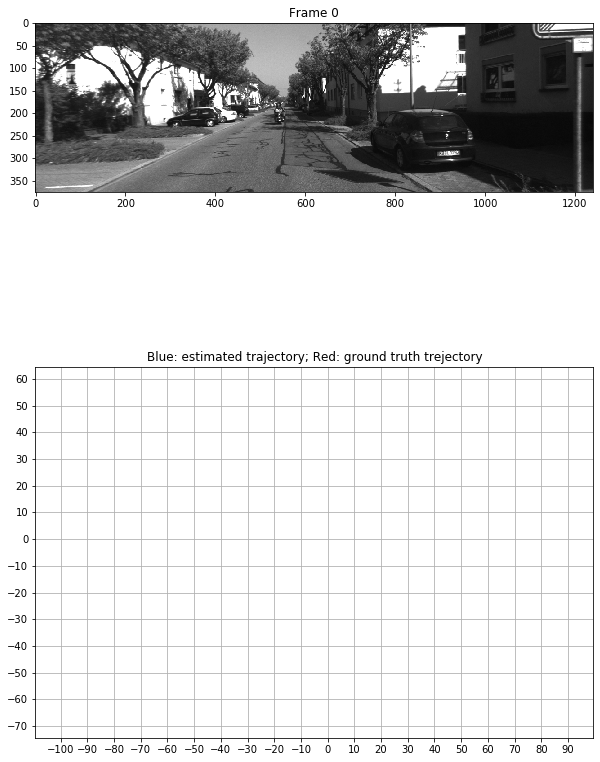

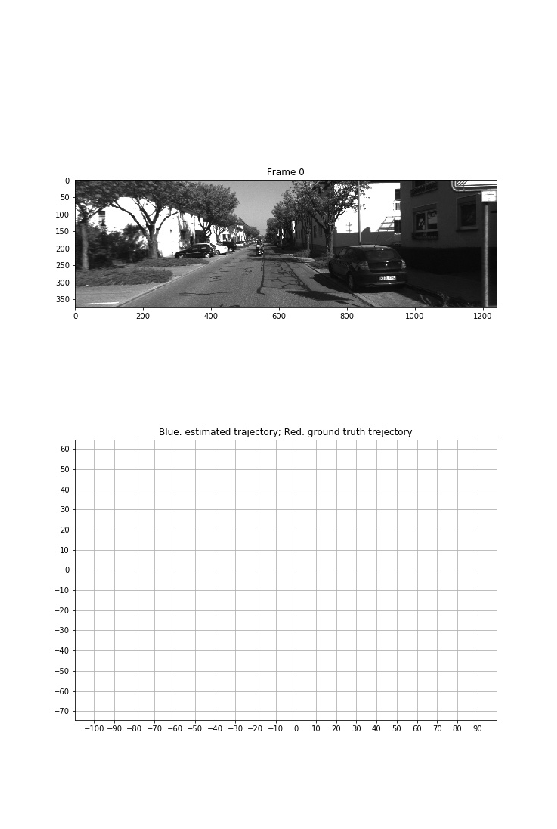

[[ 1.     -0.0028 -0.0035 -0.0003]
 [ 0.0028  1.     -0.0022 -0.0034]
 [ 0.0035  0.0022  1.      0.4718]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.07478
Mean Error Translation: 97.57803
== [Result] Frame: 1, Matches 282, Inliers: 81.21
Saved at vis_preFeature/frame001.jpg
[[ 1.     -0.0015 -0.0074 -0.0079]
 [ 0.0015  1.     -0.0036 -0.0068]
 [ 0.0074  0.0036  1.      0.9191]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.03881
Mean Error Translation: 48.99547
== [Result] Frame: 2, Matches 281, Inliers: 74.38
Saved at vis_preFeature/frame002.jpg
[[ 0.9999 -0.0022 -0.0118 -0.0123]
 [ 0.0021  1.     -0.0051 -0.0093]
 [ 0.0118  0.0051  0.9999  1.3818]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.02713
Mean Error Translation: 32.79668
== [Result] Frame: 3, Matches 292, Inliers: 77.40
Saved at vis_preFeature/frame003.jpg
[[ 0.9998 -0.002  -0.0173 -0.0196]
 [ 0.0019  1.     -0.0058 -0.0135]
 [ 0.0173  0.0057  0.9998  1.8655]
 [ 0.      0.      0.    

Mean Error Rotation: 0.00540
Mean Error Translation: 3.65006
== [Result] Frame: 29, Matches 251, Inliers: 74.50
Saved at vis_preFeature/frame029.jpg
[[ 0.9981  0.0033 -0.061  -0.9313]
 [-0.0032  1.      0.0015 -0.1906]
 [ 0.061  -0.0013  0.9981 17.6583]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00525
Mean Error Translation: 3.53739
== [Result] Frame: 30, Matches 247, Inliers: 73.28
Saved at vis_preFeature/frame030.jpg
[[ 0.9981 -0.0004 -0.061  -0.9596]
 [ 0.0002  1.     -0.0035 -0.1991]
 [ 0.061   0.0035  0.9981 18.3193]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00530
Mean Error Translation: 3.43270
== [Result] Frame: 31, Matches 236, Inliers: 60.17
Saved at vis_preFeature/frame031.jpg
[[ 0.9982 -0.0009 -0.0602 -0.9993]
 [ 0.0006  1.     -0.0066 -0.2047]
 [ 0.0602  0.0066  0.9982 18.9848]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00516
Mean Error Translation: 3.33462
== [Result] Frame: 32, Matches 233, Inliers: 75.54
Saved at vis_preFe

<Figure size 432x288 with 0 Axes>

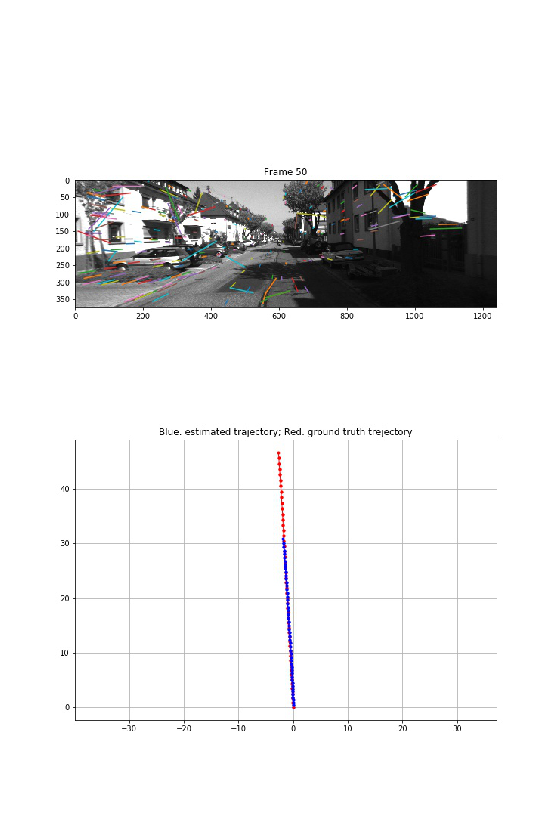

[[ 0.997  -0.0084 -0.0765 -1.8758]
 [ 0.0088  0.9999  0.0049 -0.362 ]
 [ 0.0765 -0.0056  0.9971 31.5102]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00388
Mean Error Translation: 2.22257
== [Result] Frame: 51, Matches 247, Inliers: 78.54
Saved at vis_preFeature/frame051.jpg
[[ 0.9969 -0.0087 -0.0783 -1.9186]
 [ 0.0088  1.      0.0012 -0.3737]
 [ 0.0783 -0.0019  0.9969 32.2062]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00391
Mean Error Translation: 2.18545
== [Result] Frame: 52, Matches 242, Inliers: 76.86
Saved at vis_preFeature/frame052.jpg
[[ 0.9968 -0.0092 -0.0797 -1.9744]
 [ 0.009   1.     -0.0028 -0.3836]
 [ 0.0797  0.002   0.9968 32.9194]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00388
Mean Error Translation: 2.14923
== [Result] Frame: 53, Matches 257, Inliers: 79.77
Saved at vis_preFeature/frame053.jpg
[[ 0.9967 -0.0085 -0.0809 -2.0321]
 [ 0.0082  1.     -0.0043 -0.3902]
 [ 0.0809  0.0036  0.9967 33.6403]
 [ 0.      0.      0.    

Mean Error Rotation: 0.00323
Mean Error Translation: 1.51827
== [Result] Frame: 79, Matches 273, Inliers: 81.68
Saved at vis_preFeature/frame079.jpg
[[ 0.9929 -0.0181 -0.1178 -3.629 ]
 [ 0.0174  0.9998 -0.0074 -0.6088]
 [ 0.1179  0.0053  0.993  50.6732]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00321
Mean Error Translation: 1.50133
== [Result] Frame: 80, Matches 287, Inliers: 83.62
Saved at vis_preFeature/frame080.jpg
[[ 0.9928 -0.0181 -0.1186 -3.6943]
 [ 0.0172  0.9998 -0.0088 -0.6137]
 [ 0.1187  0.0067  0.9929 51.2018]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00319
Mean Error Translation: 1.48486
== [Result] Frame: 81, Matches 293, Inliers: 86.01
Saved at vis_preFeature/frame081.jpg
[[ 0.9927 -0.0162 -0.1198 -3.7583]
 [ 0.0157  0.9999 -0.0053 -0.6248]
 [ 0.1199  0.0034  0.9928 51.7138]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00316
Mean Error Translation: 1.46877
== [Result] Frame: 82, Matches 302, Inliers: 84.44
Saved at vis_preFe

<Figure size 432x288 with 0 Axes>

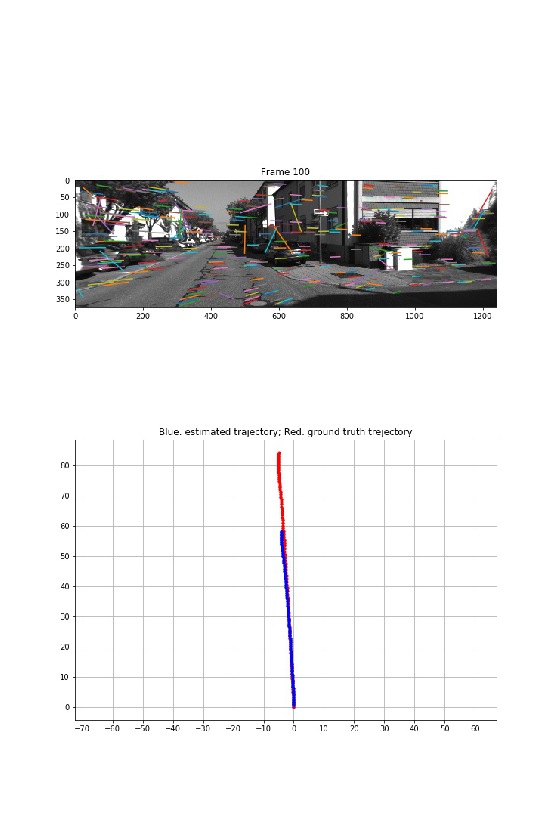

[[ 0.982  -0.0197  0.1877 -3.9998]
 [ 0.0181  0.9998  0.0104 -0.7559]
 [-0.1878 -0.0068  0.9822 58.7461]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00300
Mean Error Translation: 1.22113
== [Result] Frame: 101, Matches 304, Inliers: 84.21
Saved at vis_preFeature/frame101.jpg
[[ 0.9715 -0.0177  0.2365 -3.9014]
 [ 0.0158  0.9998  0.0097 -0.7608]
 [-0.2366 -0.0057  0.9716 59.0497]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00299
Mean Error Translation: 1.21009
== [Result] Frame: 102, Matches 296, Inliers: 86.15
Saved at vis_preFeature/frame102.jpg
[[ 0.9571 -0.0172  0.2894 -3.7839]
 [ 0.0154  0.9998  0.0083 -0.7634]
 [-0.2895 -0.0035  0.9572 59.3435]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00297
Mean Error Translation: 1.19933
== [Result] Frame: 103, Matches 303, Inliers: 89.77
Saved at vis_preFeature/frame103.jpg
[[ 0.9387 -0.0179  0.3443 -3.6426]
 [ 0.0164  0.9998  0.0074 -0.7615]
 [-0.3444 -0.0013  0.9388 59.6241]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00287
Mean Error Translation: 1.03652
== [Result] Frame: 129, Matches 289, Inliers: 61.94
Saved at vis_preFeature/frame129.jpg
[[ 0.117  -0.0139  0.993  12.7746]
 [ 0.0332  0.9994  0.0101 -0.676 ]
 [-0.9926  0.0318  0.1174 64.1722]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00286
Mean Error Translation: 1.02985
== [Result] Frame: 130, Matches 285, Inliers: 61.05
Saved at vis_preFeature/frame130.jpg
[[ 0.1054 -0.0149  0.9943 13.1301]
 [ 0.0366  0.9993  0.0111 -0.6737]
 [-0.9938  0.0352  0.1059 64.1999]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00284
Mean Error Translation: 1.02308
== [Result] Frame: 131, Matches 282, Inliers: 67.38
Saved at vis_preFeature/frame131.jpg
[[ 0.0953 -0.0148  0.9953 13.5049]
 [ 0.0391  0.9992  0.0111 -0.6739]
 [-0.9947  0.0378  0.0958 64.2299]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00283
Mean Error Translation: 1.01640
== [Result] Frame: 132, Matches 296, Inliers: 66.55
Saved at vis_p

<Figure size 432x288 with 0 Axes>

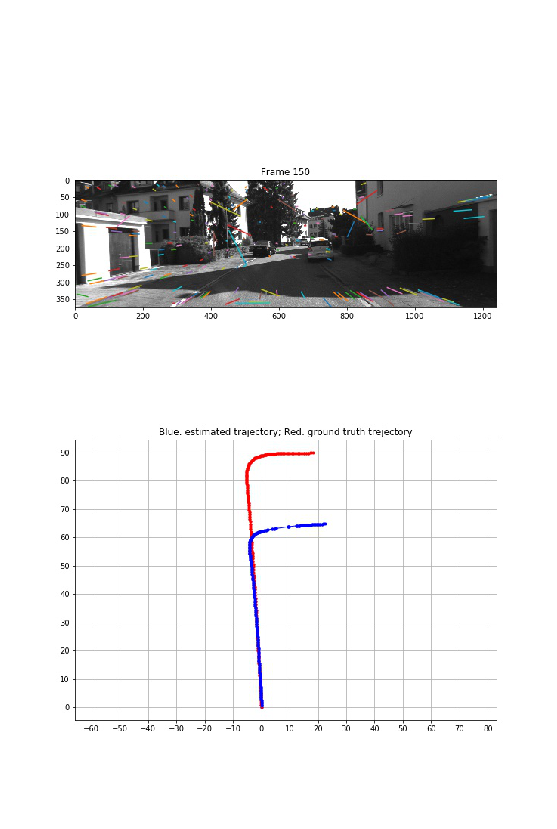

[[ 0.0934 -0.015   0.9955 23.1438]
 [ 0.0576  0.9983  0.0096 -0.6164]
 [-0.994   0.0564  0.0942 64.9119]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00264
Mean Error Translation: 0.91100
== [Result] Frame: 151, Matches 209, Inliers: 80.86
Saved at vis_preFeature/frame151.jpg
[[ 0.095  -0.0093  0.9954 23.7061]
 [ 0.0523  0.9986  0.0044 -0.6149]
 [-0.9941  0.0516  0.0953 64.9737]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00263
Mean Error Translation: 0.90664
== [Result] Frame: 152, Matches 216, Inliers: 83.33
Saved at vis_preFeature/frame152.jpg
[[ 0.0964 -0.0062  0.9953 24.2555]
 [ 0.0512  0.9987  0.0013 -0.6166]
 [-0.994   0.0508  0.0966 65.0151]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00263
Mean Error Translation: 0.90246
== [Result] Frame: 153, Matches 217, Inliers: 82.49
Saved at vis_preFeature/frame153.jpg
[[ 0.0977 -0.0068  0.9952 24.8543]
 [ 0.0511  0.9987  0.0018 -0.6198]
 [-0.9939  0.0506  0.0979 65.0662]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00248
Mean Error Translation: 0.80446
== [Result] Frame: 179, Matches 214, Inliers: 77.10
Saved at vis_preFeature/frame179.jpg
[[-0.0598 -0.0136  0.9981 45.0712]
 [ 0.0497  0.9986  0.0166 -0.6654]
 [-0.997   0.0506 -0.059  65.7696]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.80113
== [Result] Frame: 180, Matches 222, Inliers: 77.93
Saved at vis_preFeature/frame180.jpg
[[-0.0623 -0.0154  0.9979 45.6067]
 [ 0.0546  0.9983  0.0188 -0.6664]
 [-0.9966  0.0557 -0.0613 65.7182]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.79771
== [Result] Frame: 181, Matches 211, Inliers: 77.73
Saved at vis_preFeature/frame181.jpg
[[-0.0651 -0.0166  0.9977 46.1263]
 [ 0.0562  0.9982  0.0203 -0.6639]
 [-0.9963  0.0574 -0.0641 65.6875]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00247
Mean Error Translation: 0.79438
== [Result] Frame: 182, Matches 206, Inliers: 71.84
Saved at vis_p

<Figure size 432x288 with 0 Axes>

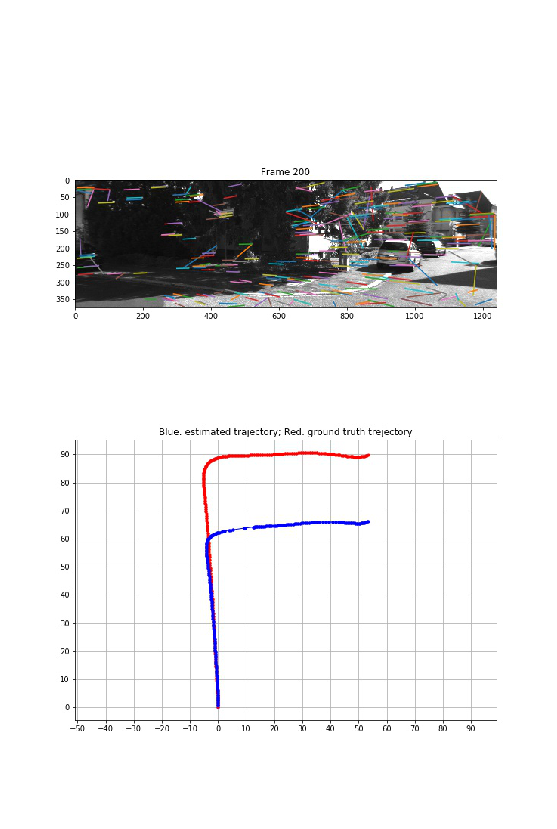

[[ 0.3722 -0.0157  0.928  53.7253]
 [ 0.0411  0.9992  0.0004 -0.7179]
 [-0.9273  0.038   0.3725 66.3636]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.73479
== [Result] Frame: 201, Matches 271, Inliers: 73.43
Saved at vis_preFeature/frame201.jpg
[[ 0.4292 -0.0156  0.9031 54.0586]
 [ 0.0448  0.999  -0.004  -0.727 ]
 [-0.9021  0.0422  0.4295 66.5446]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.73173
== [Result] Frame: 202, Matches 277, Inliers: 68.59
Saved at vis_preFeature/frame202.jpg
[[ 0.4863 -0.0101  0.8737 54.3737]
 [ 0.0429  0.999  -0.0123 -0.7314]
 [-0.8727  0.0435  0.4863 66.7682]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00249
Mean Error Translation: 0.72859
== [Result] Frame: 203, Matches 269, Inliers: 64.31
Saved at vis_preFeature/frame203.jpg
[[ 0.5467 -0.0089  0.8373 54.6738]
 [ 0.0475  0.9987 -0.0205 -0.7453]
 [-0.836   0.051   0.5463 66.9676]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00250
Mean Error Translation: 0.66058
== [Result] Frame: 229, Matches 232, Inliers: 76.29
Saved at vis_preFeature/frame229.jpg
[[ 0.9811  0.0128  0.193  57.7437]
 [-0.0057  0.9993 -0.0375 -1.2055]
 [-0.1934  0.0357  0.9805 77.9747]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00249
Mean Error Translation: 0.65831
== [Result] Frame: 230, Matches 225, Inliers: 80.00
Saved at vis_preFeature/frame230.jpg
[[ 0.9803  0.0092  0.1974 57.8618]
 [-0.0029  0.9995 -0.0321 -1.2294]
 [-0.1976  0.0309  0.9798 78.567 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.65568
== [Result] Frame: 231, Matches 213, Inliers: 76.53
Saved at vis_preFeature/frame231.jpg
[[ 0.9794  0.0078  0.2018 57.9844]
 [-0.0023  0.9996 -0.0275 -1.2535]
 [-0.2019  0.0265  0.979  79.181 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.65304
== [Result] Frame: 232, Matches 219, Inliers: 80.37
Saved at vis_p

<Figure size 432x288 with 0 Axes>

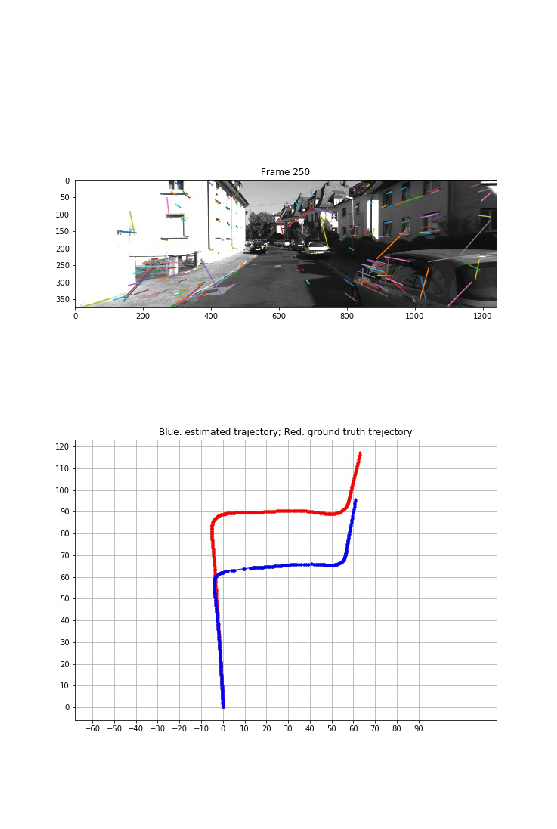

[[ 0.9842  0.0019  0.1772 61.1984]
 [ 0.0044  0.9994 -0.035  -2.0152]
 [-0.1772  0.0353  0.9835 96.281 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.62107
== [Result] Frame: 251, Matches 210, Inliers: 76.67
Saved at vis_preFeature/frame251.jpg
[[ 0.9842  0.0066  0.1772 61.3046]
 [ 0.0002  0.9993 -0.0384 -2.0432]
 [-0.1773  0.0378  0.9834 96.8975]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.61947
== [Result] Frame: 252, Matches 221, Inliers: 80.54
Saved at vis_preFeature/frame252.jpg
[[ 0.984   0.0147  0.1776 61.405 ]
 [-0.0076  0.9992 -0.0404 -2.0653]
 [-0.178   0.0384  0.9833 97.509 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.61794
== [Result] Frame: 253, Matches 209, Inliers: 85.17
Saved at vis_preFeature/frame253.jpg
[[ 0.9834  0.0202  0.1803 61.5053]
 [-0.0132  0.9991 -0.0403 -2.0903]
 [-0.1809  0.0373  0.9828 98.1339]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00248
Mean Error Translation: 0.57591
== [Result] Frame: 278, Matches 190, Inliers: 64.74
Saved at vis_preFeature/frame278.jpg
[[  0.9836   0.0322   0.1775  64.9748]
 [ -0.0245   0.9987  -0.0455  -3.1014]
 [ -0.1787   0.0404   0.9831 117.2898]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.57459
== [Result] Frame: 279, Matches 203, Inliers: 69.46
Saved at vis_preFeature/frame279.jpg
[[  0.984    0.0293   0.1756  65.1382]
 [ -0.0225   0.9989  -0.0406  -3.1547]
 [ -0.1766   0.0359   0.9836 118.1911]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.57291
== [Result] Frame: 280, Matches 214, Inliers: 66.82
Saved at vis_preFeature/frame280.jpg
[[  0.9841   0.0285   0.1753  65.2829]
 [ -0.0217   0.9989  -0.0411  -3.2023]
 [ -0.1763   0.0366   0.9837 119.1248]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00247
Mean Error Translation: 0.57139
== [Result] Frame:

<Figure size 432x288 with 0 Axes>

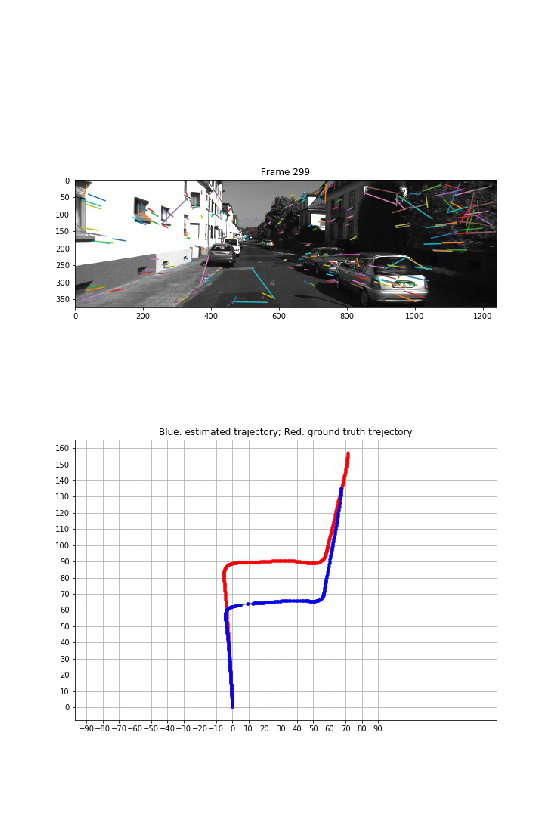

In [7]:
import runFeature
dataset_path = '/datasets/cse152-252-sp20-public/dataset_SfM'
feature_dir = 'SIFT'
runFeature.runSFM(dataset_path, feature_dir)

1. Report the final rotation and translation error. **(2 points)**

The final errors are:
1. Rotation: 0.00243
2. Translation: 0.55841

Next, answer the following questions:

2. Does SIFT yield higher accuracy than the original $\mathtt{libviso2}$? Why or why not? If not, can you suggest one possible way to improve? **(5 points)**

Using SIFT, the finall rotation error is marginally smaller than the rotation error of libviso2 (0.00243 vs. 0.00277), but the translation error is larger (0.55841 vs. 0.53721). Overall, using SIFT does not give much higher accuracy than the original libviso2.

3. Explain how SIFT achieves invariance to 
       a. illumination
       b. rotation
       c. scale
 **(3 points)**

SIFT achieves invariance to the three transformation based on the following principles:

a) 
b)
c) SIFT computes DoG with different $\sigma$ at the same resolution of the image;


## Question 3: Using SuperPoint[1] for SFM

Now you are required to use keypoints and feature descriptors from SuperPoint for SFM. The code for the trained model of this method can be found from the $\mathtt{SuperPoint}$.

(A) Go to $\mathtt{SuperPoint}$ directory and run $\mathtt{demo\_superpoint.py}$. The detected keypoints and feature descriptors are under the directory $\mathtt{SuperPoint}$. The file format is similar to the SIFT case. For image $\mathtt{000abc.png}$, the pre-computed features and keypoints should be saved in a $\mathtt{.npy}$ file named as $\mathtt{000abc\_feature.npy}$. The variable is a $258\times N$ matrix with $\mathtt{single}$ precision, where $N$ is the number of feature points being detected. For each $258$-dimensional feature vector, the first two dimensions are the locations of the keypoint (column number first and then row number) on the image plane and the last $256$ dimensions represent the feature descriptor. 

(B) Run the following script

Mean Error Rotation: inf
Mean Error Translation: inf
== [Result] Frame: 0, Matches 0, Inliers: 0.00
Saved at vis_preFeature/frame000.jpg


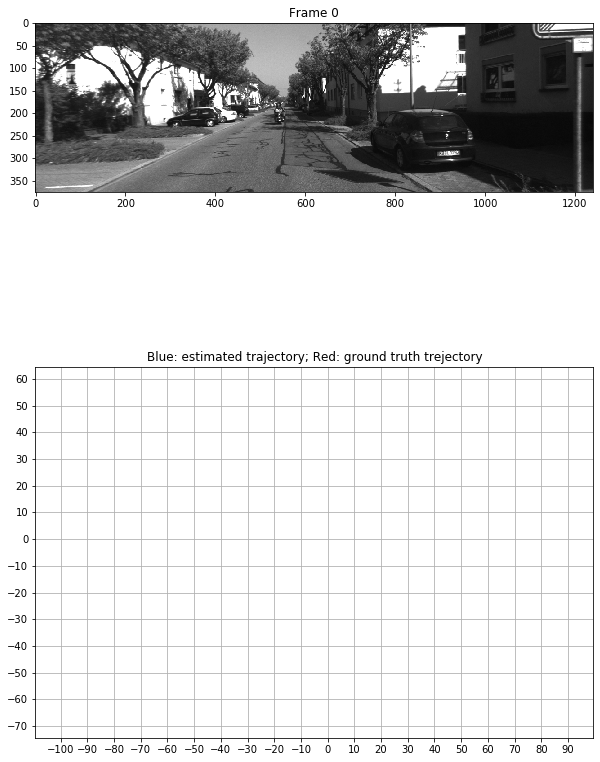

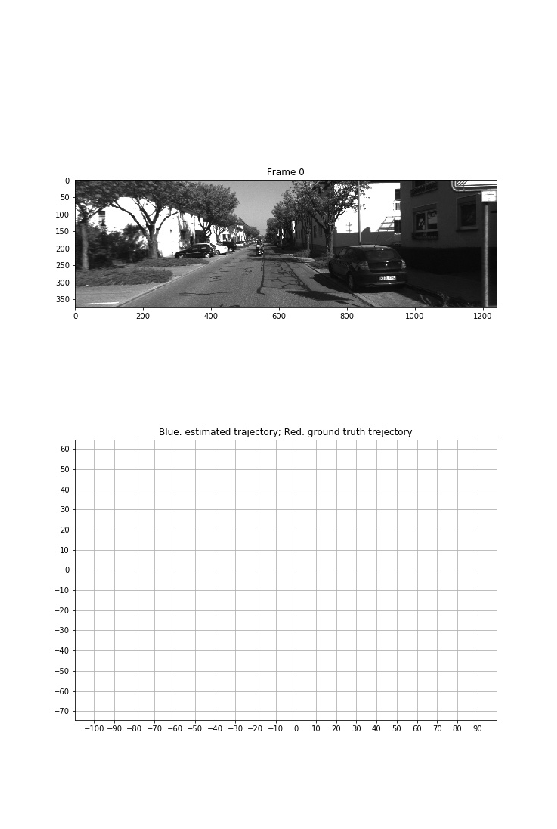

[[ 1.     -0.0028 -0.0035 -0.0003]
 [ 0.0028  1.     -0.0022 -0.0034]
 [ 0.0035  0.0022  1.      0.4718]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.07478
Mean Error Translation: 97.57803
== [Result] Frame: 1, Matches 282, Inliers: 81.21
Saved at vis_preFeature/frame001.jpg
[[ 1.     -0.0015 -0.0074 -0.0079]
 [ 0.0015  1.     -0.0036 -0.0068]
 [ 0.0074  0.0036  1.      0.9191]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.03881
Mean Error Translation: 48.99547
== [Result] Frame: 2, Matches 281, Inliers: 74.38
Saved at vis_preFeature/frame002.jpg
[[ 0.9999 -0.0022 -0.0118 -0.0123]
 [ 0.0021  1.     -0.0051 -0.0093]
 [ 0.0118  0.0051  0.9999  1.3818]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.02713
Mean Error Translation: 32.79668
== [Result] Frame: 3, Matches 292, Inliers: 77.40
Saved at vis_preFeature/frame003.jpg
[[ 0.9998 -0.002  -0.0173 -0.0196]
 [ 0.0019  1.     -0.0058 -0.0135]
 [ 0.0173  0.0057  0.9998  1.8655]
 [ 0.      0.      0.    

Mean Error Rotation: 0.00540
Mean Error Translation: 3.65006
== [Result] Frame: 29, Matches 251, Inliers: 74.50
Saved at vis_preFeature/frame029.jpg
[[ 0.9981  0.0033 -0.061  -0.9313]
 [-0.0032  1.      0.0015 -0.1906]
 [ 0.061  -0.0013  0.9981 17.6583]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00525
Mean Error Translation: 3.53739
== [Result] Frame: 30, Matches 247, Inliers: 73.28
Saved at vis_preFeature/frame030.jpg
[[ 0.9981 -0.0004 -0.061  -0.9596]
 [ 0.0002  1.     -0.0035 -0.1991]
 [ 0.061   0.0035  0.9981 18.3193]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00530
Mean Error Translation: 3.43270
== [Result] Frame: 31, Matches 236, Inliers: 60.17
Saved at vis_preFeature/frame031.jpg
[[ 0.9982 -0.0009 -0.0602 -0.9993]
 [ 0.0006  1.     -0.0066 -0.2047]
 [ 0.0602  0.0066  0.9982 18.9848]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00516
Mean Error Translation: 3.33462
== [Result] Frame: 32, Matches 233, Inliers: 75.54
Saved at vis_preFe

<Figure size 432x288 with 0 Axes>

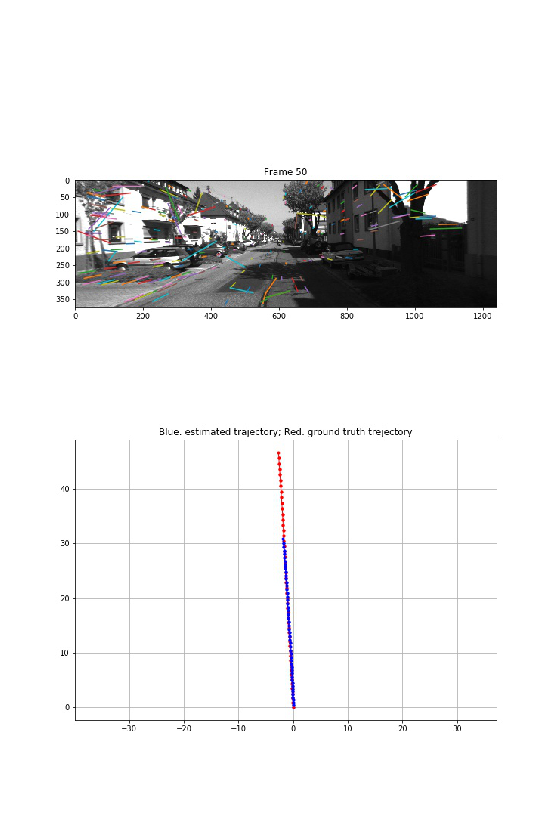

[[ 0.997  -0.0084 -0.0765 -1.8758]
 [ 0.0088  0.9999  0.0049 -0.362 ]
 [ 0.0765 -0.0056  0.9971 31.5102]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00388
Mean Error Translation: 2.22257
== [Result] Frame: 51, Matches 247, Inliers: 78.54
Saved at vis_preFeature/frame051.jpg
[[ 0.9969 -0.0087 -0.0783 -1.9186]
 [ 0.0088  1.      0.0012 -0.3737]
 [ 0.0783 -0.0019  0.9969 32.2062]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00391
Mean Error Translation: 2.18545
== [Result] Frame: 52, Matches 242, Inliers: 76.86
Saved at vis_preFeature/frame052.jpg
[[ 0.9968 -0.0092 -0.0797 -1.9744]
 [ 0.009   1.     -0.0028 -0.3836]
 [ 0.0797  0.002   0.9968 32.9194]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00388
Mean Error Translation: 2.14923
== [Result] Frame: 53, Matches 257, Inliers: 79.77
Saved at vis_preFeature/frame053.jpg
[[ 0.9967 -0.0085 -0.0809 -2.0321]
 [ 0.0082  1.     -0.0043 -0.3902]
 [ 0.0809  0.0036  0.9967 33.6403]
 [ 0.      0.      0.    

Mean Error Rotation: 0.00323
Mean Error Translation: 1.51827
== [Result] Frame: 79, Matches 273, Inliers: 81.68
Saved at vis_preFeature/frame079.jpg
[[ 0.9929 -0.0181 -0.1178 -3.629 ]
 [ 0.0174  0.9998 -0.0074 -0.6088]
 [ 0.1179  0.0053  0.993  50.6732]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00321
Mean Error Translation: 1.50133
== [Result] Frame: 80, Matches 287, Inliers: 83.62
Saved at vis_preFeature/frame080.jpg
[[ 0.9928 -0.0181 -0.1186 -3.6943]
 [ 0.0172  0.9998 -0.0088 -0.6137]
 [ 0.1187  0.0067  0.9929 51.2018]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00319
Mean Error Translation: 1.48486
== [Result] Frame: 81, Matches 293, Inliers: 86.01
Saved at vis_preFeature/frame081.jpg
[[ 0.9927 -0.0162 -0.1198 -3.7583]
 [ 0.0157  0.9999 -0.0053 -0.6248]
 [ 0.1199  0.0034  0.9928 51.7138]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00316
Mean Error Translation: 1.46877
== [Result] Frame: 82, Matches 302, Inliers: 84.44
Saved at vis_preFe

<Figure size 432x288 with 0 Axes>

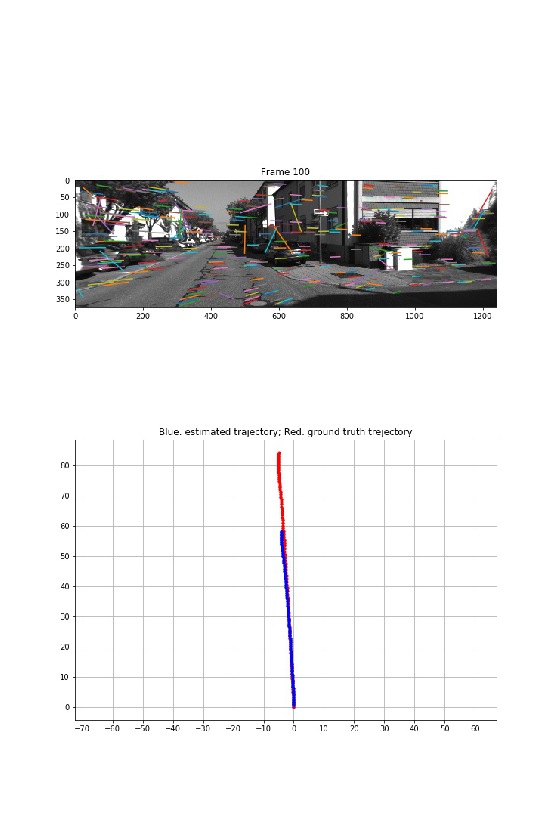

[[ 0.982  -0.0197  0.1877 -3.9998]
 [ 0.0181  0.9998  0.0104 -0.7559]
 [-0.1878 -0.0068  0.9822 58.7461]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00300
Mean Error Translation: 1.22113
== [Result] Frame: 101, Matches 304, Inliers: 84.21
Saved at vis_preFeature/frame101.jpg
[[ 0.9715 -0.0177  0.2365 -3.9014]
 [ 0.0158  0.9998  0.0097 -0.7608]
 [-0.2366 -0.0057  0.9716 59.0497]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00299
Mean Error Translation: 1.21009
== [Result] Frame: 102, Matches 296, Inliers: 86.15
Saved at vis_preFeature/frame102.jpg
[[ 0.9571 -0.0172  0.2894 -3.7839]
 [ 0.0154  0.9998  0.0083 -0.7634]
 [-0.2895 -0.0035  0.9572 59.3435]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00297
Mean Error Translation: 1.19933
== [Result] Frame: 103, Matches 303, Inliers: 89.77
Saved at vis_preFeature/frame103.jpg
[[ 0.9387 -0.0179  0.3443 -3.6426]
 [ 0.0164  0.9998  0.0074 -0.7615]
 [-0.3444 -0.0013  0.9388 59.6241]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00287
Mean Error Translation: 1.03652
== [Result] Frame: 129, Matches 289, Inliers: 61.94
Saved at vis_preFeature/frame129.jpg
[[ 0.117  -0.0139  0.993  12.7746]
 [ 0.0332  0.9994  0.0101 -0.676 ]
 [-0.9926  0.0318  0.1174 64.1722]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00286
Mean Error Translation: 1.02985
== [Result] Frame: 130, Matches 285, Inliers: 61.05
Saved at vis_preFeature/frame130.jpg
[[ 0.1054 -0.0149  0.9943 13.1301]
 [ 0.0366  0.9993  0.0111 -0.6737]
 [-0.9938  0.0352  0.1059 64.1999]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00284
Mean Error Translation: 1.02308
== [Result] Frame: 131, Matches 282, Inliers: 67.38
Saved at vis_preFeature/frame131.jpg
[[ 0.0953 -0.0148  0.9953 13.5049]
 [ 0.0391  0.9992  0.0111 -0.6739]
 [-0.9947  0.0378  0.0958 64.2299]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00283
Mean Error Translation: 1.01640
== [Result] Frame: 132, Matches 296, Inliers: 66.55
Saved at vis_p

<Figure size 432x288 with 0 Axes>

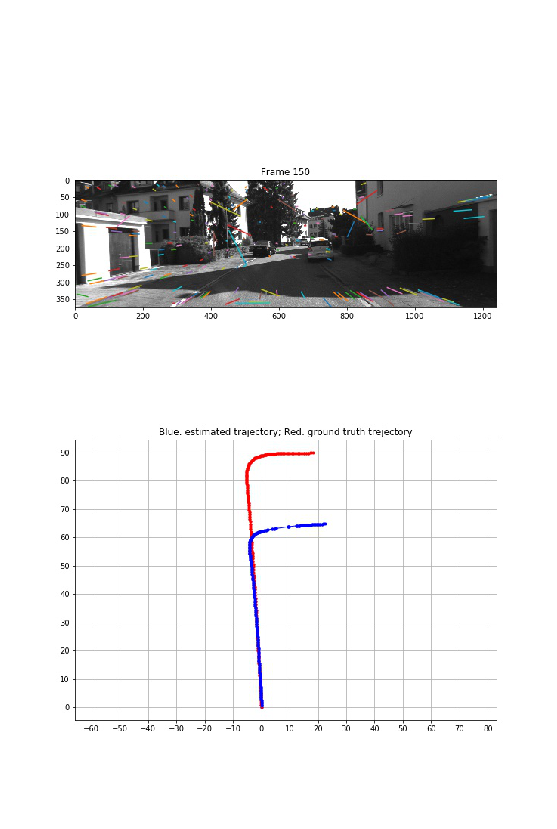

[[ 0.0934 -0.015   0.9955 23.1438]
 [ 0.0576  0.9983  0.0096 -0.6164]
 [-0.994   0.0564  0.0942 64.9119]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00264
Mean Error Translation: 0.91100
== [Result] Frame: 151, Matches 209, Inliers: 80.86
Saved at vis_preFeature/frame151.jpg
[[ 0.095  -0.0093  0.9954 23.7061]
 [ 0.0523  0.9986  0.0044 -0.6149]
 [-0.9941  0.0516  0.0953 64.9737]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00263
Mean Error Translation: 0.90664
== [Result] Frame: 152, Matches 216, Inliers: 83.33
Saved at vis_preFeature/frame152.jpg
[[ 0.0964 -0.0062  0.9953 24.2555]
 [ 0.0512  0.9987  0.0013 -0.6166]
 [-0.994   0.0508  0.0966 65.0151]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00263
Mean Error Translation: 0.90246
== [Result] Frame: 153, Matches 217, Inliers: 82.49
Saved at vis_preFeature/frame153.jpg
[[ 0.0977 -0.0068  0.9952 24.8543]
 [ 0.0511  0.9987  0.0018 -0.6198]
 [-0.9939  0.0506  0.0979 65.0662]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00248
Mean Error Translation: 0.80446
== [Result] Frame: 179, Matches 214, Inliers: 77.10
Saved at vis_preFeature/frame179.jpg
[[-0.0598 -0.0136  0.9981 45.0712]
 [ 0.0497  0.9986  0.0166 -0.6654]
 [-0.997   0.0506 -0.059  65.7696]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.80113
== [Result] Frame: 180, Matches 222, Inliers: 77.93
Saved at vis_preFeature/frame180.jpg
[[-0.0623 -0.0154  0.9979 45.6067]
 [ 0.0546  0.9983  0.0188 -0.6664]
 [-0.9966  0.0557 -0.0613 65.7182]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.79771
== [Result] Frame: 181, Matches 211, Inliers: 77.73
Saved at vis_preFeature/frame181.jpg
[[-0.0651 -0.0166  0.9977 46.1263]
 [ 0.0562  0.9982  0.0203 -0.6639]
 [-0.9963  0.0574 -0.0641 65.6875]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00247
Mean Error Translation: 0.79438
== [Result] Frame: 182, Matches 206, Inliers: 71.84
Saved at vis_p

<Figure size 432x288 with 0 Axes>

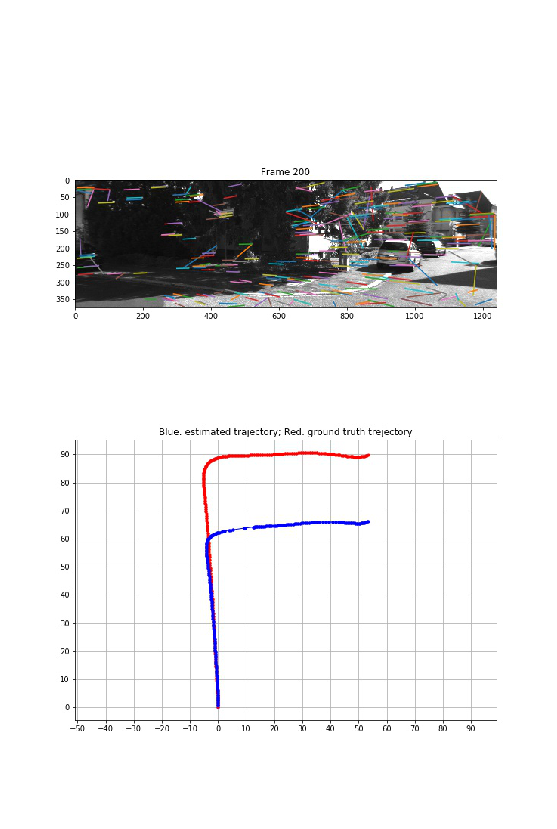

[[ 0.3722 -0.0157  0.928  53.7253]
 [ 0.0411  0.9992  0.0004 -0.7179]
 [-0.9273  0.038   0.3725 66.3636]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.73479
== [Result] Frame: 201, Matches 271, Inliers: 73.43
Saved at vis_preFeature/frame201.jpg
[[ 0.4292 -0.0156  0.9031 54.0586]
 [ 0.0448  0.999  -0.004  -0.727 ]
 [-0.9021  0.0422  0.4295 66.5446]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.73173
== [Result] Frame: 202, Matches 277, Inliers: 68.59
Saved at vis_preFeature/frame202.jpg
[[ 0.4863 -0.0101  0.8737 54.3737]
 [ 0.0429  0.999  -0.0123 -0.7314]
 [-0.8727  0.0435  0.4863 66.7682]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00249
Mean Error Translation: 0.72859
== [Result] Frame: 203, Matches 269, Inliers: 64.31
Saved at vis_preFeature/frame203.jpg
[[ 0.5467 -0.0089  0.8373 54.6738]
 [ 0.0475  0.9987 -0.0205 -0.7453]
 [-0.836   0.051   0.5463 66.9676]
 [ 0.      0.      0. 

Mean Error Rotation: 0.00250
Mean Error Translation: 0.66058
== [Result] Frame: 229, Matches 232, Inliers: 76.29
Saved at vis_preFeature/frame229.jpg
[[ 0.9811  0.0128  0.193  57.7437]
 [-0.0057  0.9993 -0.0375 -1.2055]
 [-0.1934  0.0357  0.9805 77.9747]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00249
Mean Error Translation: 0.65831
== [Result] Frame: 230, Matches 225, Inliers: 80.00
Saved at vis_preFeature/frame230.jpg
[[ 0.9803  0.0092  0.1974 57.8618]
 [-0.0029  0.9995 -0.0321 -1.2294]
 [-0.1976  0.0309  0.9798 78.567 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.65568
== [Result] Frame: 231, Matches 213, Inliers: 76.53
Saved at vis_preFeature/frame231.jpg
[[ 0.9794  0.0078  0.2018 57.9844]
 [-0.0023  0.9996 -0.0275 -1.2535]
 [-0.2019  0.0265  0.979  79.181 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.65304
== [Result] Frame: 232, Matches 219, Inliers: 80.37
Saved at vis_p

<Figure size 432x288 with 0 Axes>

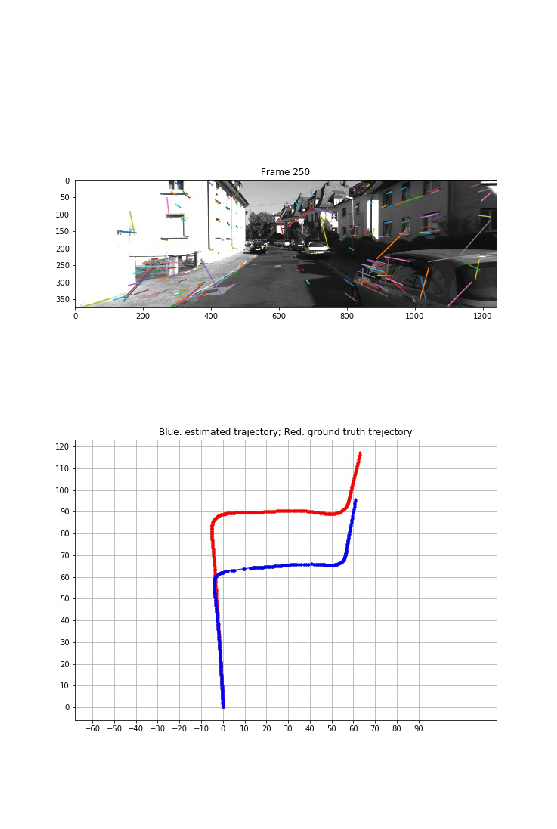

[[ 0.9842  0.0019  0.1772 61.1984]
 [ 0.0044  0.9994 -0.035  -2.0152]
 [-0.1772  0.0353  0.9835 96.281 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.62107
== [Result] Frame: 251, Matches 210, Inliers: 76.67
Saved at vis_preFeature/frame251.jpg
[[ 0.9842  0.0066  0.1772 61.3046]
 [ 0.0002  0.9993 -0.0384 -2.0432]
 [-0.1773  0.0378  0.9834 96.8975]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.61947
== [Result] Frame: 252, Matches 221, Inliers: 80.54
Saved at vis_preFeature/frame252.jpg
[[ 0.984   0.0147  0.1776 61.405 ]
 [-0.0076  0.9992 -0.0404 -2.0653]
 [-0.178   0.0384  0.9833 97.509 ]
 [ 0.      0.      0.      1.    ]]
Mean Error Rotation: 0.00244
Mean Error Translation: 0.61794
== [Result] Frame: 253, Matches 209, Inliers: 85.17
Saved at vis_preFeature/frame253.jpg
[[ 0.9834  0.0202  0.1803 61.5053]
 [-0.0132  0.9991 -0.0403 -2.0903]
 [-0.1809  0.0373  0.9828 98.1339]
 [ 0.      0.      0. 

[[  0.9834   0.0299   0.1788  64.8149]
 [ -0.0217   0.9986  -0.0472  -3.0448]
 [ -0.18     0.0425   0.9827 116.2839]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.57591
== [Result] Frame: 278, Matches 190, Inliers: 64.74
Saved at vis_preFeature/frame278.jpg
[[  0.9836   0.0322   0.1775  64.9748]
 [ -0.0245   0.9987  -0.0455  -3.1014]
 [ -0.1787   0.0404   0.9831 117.2898]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.57459
== [Result] Frame: 279, Matches 203, Inliers: 69.46
Saved at vis_preFeature/frame279.jpg
[[  0.984    0.0293   0.1756  65.1382]
 [ -0.0225   0.9989  -0.0406  -3.1547]
 [ -0.1766   0.0359   0.9836 118.1911]
 [  0.       0.       0.       1.    ]]
Mean Error Rotation: 0.00248
Mean Error Translation: 0.57291
== [Result] Frame: 280, Matches 214, Inliers: 66.82
Saved at vis_preFeature/frame280.jpg
[[  0.9841   0.0285   0.1753  65.2829]
 [ -0.0217   0.9989  -0.0411  -3.2023]
 

<Figure size 432x288 with 0 Axes>

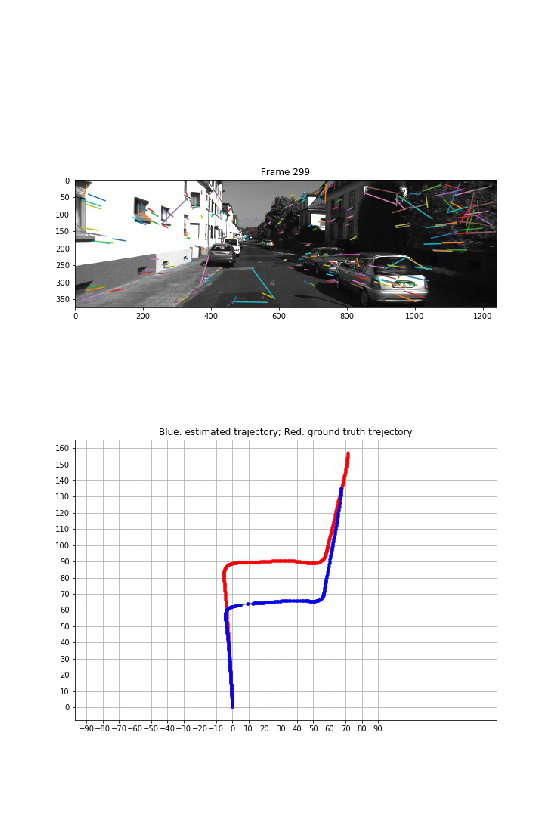

In [10]:
import runFeature
dataset_path = '/datasets/cse152-252-sp20-public/dataset_SfM'
feature_dir = 'SuperPoint'
runFeature.runSFM(dataset_path, feature_dir )

1. Report the final rotation and translation error. **(2 points)**

The final errors are:
1. Rotation: 0.00243
2. Translation: 0.55841

Next, answer the following questions:

2. Does SuperPoint yield higher accuracy than the original $\mathtt{libviso2}$? If so, why? If not, what steps can you take to improve? **(5 points)**

``answer here``

3. Explain briefly how the following issues are being handled in SuperPoint: **(3 points)**
       a. Obtaining ground truth for keypoints.
       b. Cheaply obtaining accurate ground truth matches, as compared to LIDAR in UCN or SFM in LIFT.
       c. Learning a correlated feature representation for keypoint detection and description? 

``answer here``

## Question 4: Using SPyNet [5] for SFM

Now we will compute camera motion from optical flow computed using SPyNet. We first uniformly sample points in an image, then consider the flow-displaced point in the other image as a match. A modified PyTorch implementation of SPyNet is provided in directory  $\mathtt{Flow}$.

(A) Go to $\mathtt{Flow}$ and run $\mathtt{demo\_spynet.py}$. 

(B) Run the following script.

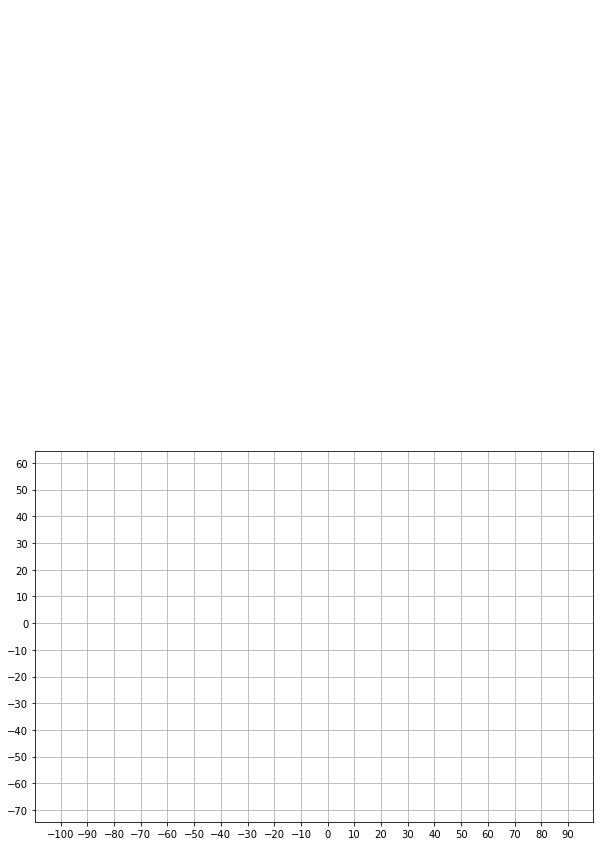

Mean Error Rotation: inf
Mean Error Translation: inf
== [Result] Frame: 0, Matches 0, Inliers: 0.00


/datasets/home/home-02/70/670/y2di/cse252c_hw1/pyviso/runMatch.py:203: RuntimeWarning: divide by zero encountered in double_scalars
  print('Mean Error Rotation: %.5f'%(errorRotSum / (k-1)))
/datasets/home/home-02/70/670/y2di/cse252c_hw1/pyviso/runMatch.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  print('Mean Error Translation: %.5f'%(errorTransSum / (k-1)))


<Figure size 432x288 with 0 Axes>

Saved at vis_preFeature/frame000.jpg


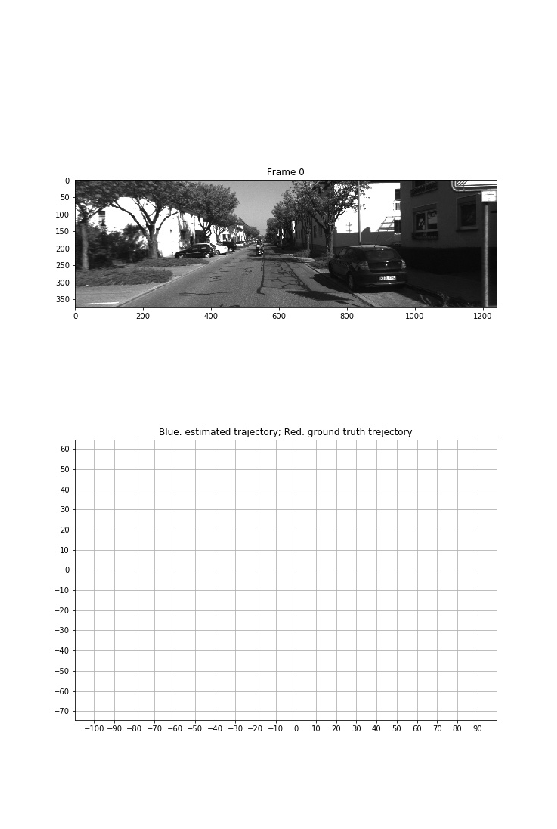

FileNotFoundError: [Errno 2] No such file or directory: 'Flow/000001_flow.npy'

In [3]:
import runMatch
dataset_path = '/datasets/cse152-252-sp20-public/dataset_SfM'
feature_dir = 'Flow'
runMatch.runSFM(dataset_path, feature_dir )

1. Report the final rotation and translation error. **(2 points)**

``report two error metrics over all frames here``

Next, answer the following questions:

2. Does SPyNet yield higher accuracy than the original $\mathtt{libviso2}$? Why or why not? If not, what steps can you take to improve? **(5 points)**

``answer here``

3. Explain how SPyNet achieves accurate flow with significantly lower computational cost. **(3 points)**

``answer here``

## Question 5: Using Sfm-learner for SFM
Now we will use deep neural networks for SFM. Please follow the open-source Sfmlearner repository (https://github.com/ClementPinard/SfmLearner-Pytorch) and the paper (https://people.eecs.berkeley.edu/~tinghuiz/projects/SfMLearner/cvpr17_sfm_final.pdf) to answer the following questions.

1. Describe how photometric loss is implemented in Sfmlearner? Please refer to the paper and the code. **(5 points)**

``answer here``

2. Train the model and show the training curve, validation curve, and visualization of predicted depth and warped images? Which loss is decreasing and which is increasing? Why? **(10 points)**

 Visualize the specific images: `val_Depth_Output_Normalized/0`, `val_Warped_Outputs/0` from tensorboard.
 
 Training data: 
`/datasets/cse152-252-sp20-public/sfmlearner_h128w416`.

#### Install the environment
`pip install -r requirements.txt`
- fix scipy version problem: 

`pip install scipy==1.1.0 --user`

#### Training script
`cd SfmLearner-Pytorch`

`python3 train.py /datasets/cse152-252-sp20-public/sfmlearner_h128w416 -b4 -m0.2 -s0.1 --epoch-size 3000 --sequence-length 3 --log-output`




``answer here``

3. When training the model, we use 3 consecutive frames. Now, you will use the photometric consistency between the 1st and the 3rd frame. To be more specific, you can get the pose $T_{1,3} = T_{2,3} @ T_{1,2}$, where $T_{1,2}, T_{2,3}$ have already been computed in the original code. Add the constraint to the total loss and report the results in the same manner as in part 2 above. **(10 points)**

``answer here``

4. Now, you will evaluate your models from parts (2), (3) on the KITTI odometry dataset. What are the error metrics used in Sfm-learner? Please report the `ATE` and `RE` for sequence `09` and `10`. **(5 points)**

  Data: `/datasets/cse152-252-sp20-public/kitti`.

#### Evaluation script
`python3 test_pose.py /path/to/posenet --dataset-dir /datasets/cse152-252-sp20-public/kitti --sequences 09`

``answer here``

### Notes:
- scp data to local machines:

`scp -r <USERNAME>@dsmlp-login.ucsd.edu:/datasets/cse152-252-sp20-public/sfmlearner_h128w416.zip`

`scp -r <USERNAME>@dsmlp-login.ucsd.edu:/datasets/cse152-252-sp20-public/kitti.zip`
...
- tensorboard: open jupyter notebook from the link after `launch-scipy-ml-gpu.sh`. Click new `Tensorboard ..`

# References
1. Daniel DeTone, Tomasz Malisiewicz, and Andrew Rabinovich. Superpoint: Self-supervised interest point detection and description. In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition Workshops, pages 224–236, 2018.
2. Andreas Geiger, Philip Lenz, and Raquel Urtasun. Are we ready for autonomous driving? the kitti vision benchmark suite. In Conference on Computer Vision and Pattern Recognition (CVPR), 2012.
3. Andreas Geiger, Julius Ziegler, and Christoph Stiller. Stereoscan: Dense 3d reconstruction in real-time. In Intelligent Vehicles Symposium (IV), 2011.
4. David G Lowe. Distinctive image features from scale-invariant keypoints. IJCV, 60(2):91–110, 2004.
5. Anurag Ranjan and Michael J Black. Optical flow estimation using a spatial pyramid network. In
Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition, pages 4161–4170, 2017.
6. A. Vedaldi and B. Fulkerson. VLFeat: An open and portable library of computer vision algorithms. http://www.vlfeat.org/, 2008.
7. Lucas, Bruce D., and Takeo Kanade. "An iterative image registration technique with an application to stereo vision." (1981): 674.